# MARINE FISH DATA ANALYSIS

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Data

In [4]:
marine_data = pd.read_csv('/Users/megavishy/Downloads/Marine_Fish_Data.csv')

In [3]:
marine_data.head

<bound method NDFrame.head of     Species_Name             Region Breeding_Season Fishing_Method  \
0         Salmon     North Atlantic          Summer            Net   
1           Tuna      Pacific Ocean         Monsoon           Line   
2            Cod  Mediterranean Sea          Summer           Line   
3        Herring      Pacific Ocean         Monsoon          Trawl   
4        Herring       Indian Ocean         Monsoon          Trawl   
..           ...                ...             ...            ...   
495       Salmon  Mediterranean Sea         Monsoon          Trawl   
496      Sardine      Pacific Ocean         Monsoon           Line   
497     Mackerel       Indian Ocean          Summer            Net   
498        Shark     North Atlantic         Monsoon            Net   
499     Mackerel  Mediterranean Sea          Winter           Line   

     Fish_Population  Average_Size(cm) Overfishing_Risk  Water_Temperature(C)  \
0               8270             71.92          

In [4]:
marine_data.tail

<bound method NDFrame.tail of     Species_Name             Region Breeding_Season Fishing_Method  \
0         Salmon     North Atlantic          Summer            Net   
1           Tuna      Pacific Ocean         Monsoon           Line   
2            Cod  Mediterranean Sea          Summer           Line   
3        Herring      Pacific Ocean         Monsoon          Trawl   
4        Herring       Indian Ocean         Monsoon          Trawl   
..           ...                ...             ...            ...   
495       Salmon  Mediterranean Sea         Monsoon          Trawl   
496      Sardine      Pacific Ocean         Monsoon           Line   
497     Mackerel       Indian Ocean          Summer            Net   
498        Shark     North Atlantic         Monsoon            Net   
499     Mackerel  Mediterranean Sea          Winter           Line   

     Fish_Population  Average_Size(cm) Overfishing_Risk  Water_Temperature(C)  \
0               8270             71.92          

In [5]:
marine_data.info

<bound method DataFrame.info of     Species_Name             Region Breeding_Season Fishing_Method  \
0         Salmon     North Atlantic          Summer            Net   
1           Tuna      Pacific Ocean         Monsoon           Line   
2            Cod  Mediterranean Sea          Summer           Line   
3        Herring      Pacific Ocean         Monsoon          Trawl   
4        Herring       Indian Ocean         Monsoon          Trawl   
..           ...                ...             ...            ...   
495       Salmon  Mediterranean Sea         Monsoon          Trawl   
496      Sardine      Pacific Ocean         Monsoon           Line   
497     Mackerel       Indian Ocean          Summer            Net   
498        Shark     North Atlantic         Monsoon            Net   
499     Mackerel  Mediterranean Sea          Winter           Line   

     Fish_Population  Average_Size(cm) Overfishing_Risk  Water_Temperature(C)  \
0               8270             71.92        

In [6]:
marine_data.dtypes

Species_Name              object
Region                    object
Breeding_Season           object
Fishing_Method            object
Fish_Population            int64
Average_Size(cm)         float64
Overfishing_Risk          object
Water_Temperature(C)     float64
Water_Pollution_Level     object
dtype: object

In [7]:
marine_data.columns

Index(['Species_Name', 'Region', 'Breeding_Season', 'Fishing_Method',
       'Fish_Population', 'Average_Size(cm)', 'Overfishing_Risk',
       'Water_Temperature(C)', 'Water_Pollution_Level'],
      dtype='object')

In [8]:
marine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fish_Population,500.0,5628.79000,2541.521134,1004.00,3499.25,5813.000,7877.7500,9996.00
Average_Size(cm),500.0,56.02296,24.962762,10.23,35.13,57.520,77.4625,99.79
Water_Temperature(C),500.0,22.55230,4.359735,15.00,18.79,22.785,26.1825,29.99


## Preprocessing

In [9]:
#check for duplicate values
marine_data.duplicated().sum()

0

In [10]:
#check for unique values
for columns in marine_data:
    print(f" \n unique values are {columns} :")
    print(marine_data[columns].unique())

 
 unique values are Species_Name :
['Salmon' 'Tuna' 'Cod' 'Herring' 'Mackerel' 'Sardine' 'Shark' 'Snapper']
 
 unique values are Region :
['North Atlantic' 'Pacific Ocean' 'Mediterranean Sea' 'Indian Ocean']
 
 unique values are Breeding_Season :
['Summer' 'Monsoon' 'Winter']
 
 unique values are Fishing_Method :
['Net' 'Line' 'Trawl']
 
 unique values are Fish_Population :
[8270 1860 6390 6191 6734 7265 1466 5426 6578 9322 2685 1769 7949 3433
 6311 6051 7420 2184 5555 4385 7396 9666 3558 8849 3047 3747 1189 3734
 4005 5658 2899 8734 2267 2528 4556 4890 9838 6393 9792 9433 8513 3612
 8041 7235 6486 8099 1775 9226 4152 2585 4943 8555 4073 2021 4843 8989
 7873 6675 1161 5297 1995 8629 2016 8869 7439 8892 7863 8916 9529 1878
 5887 5859 7331 9571 9684 8208 6276 3062 1064 9006 3568 6463 3027 3695
 6258 6618 7736 1391 6892 4561 7184 4099 7278 9392 4104 8215 3454 9996
 3731 9154 6056 9110 4840 2028 8385 1502 7910 7938 5488 1206 6134 6977
 8721 8035 2484 8858 1863 3790 8408 9755 6116 7019 275

In [11]:
#Check for null values and replace them

# First check overall nulls in dataset
print("\nTotal nulls in each column:")
print(marine_data.isnull().sum())

# Use for loop for quick null handling
for column in marine_data.columns:
    null_count = marine_data[column].isnull().sum()
    if null_count > 0:
        print(f"\n{column}:")
        print(f"Null count: {null_count}")
        print(f"Null percentage: {(null_count/len(marine_data))*100:.2f}%")
        
        # Create flag column
        marine_data[f"{column}_null_flag"] = marine_data[column].isnull()
        
        # Fill nulls based on data type
        if marine_data[column].dtype in ['int64', 'float64']:
            marine_data[column] = marine_data[column].fillna(marine_data[column].mean())
        else:
            marine_data[column] = marine_data[column].fillna(marine_data[column].mode()[0])


Total nulls in each column:
Species_Name             0
Region                   0
Breeding_Season          0
Fishing_Method           0
Fish_Population          0
Average_Size(cm)         0
Overfishing_Risk         0
Water_Temperature(C)     0
Water_Pollution_Level    0
dtype: int64


In [12]:
# check for temperature values
print(f"Temperature Range - Min: {marine_data['Water_Temperature(C)'].min()}, Max: {marine_data['Water_Temperature(C)'].max()}, Negative Values: {len(marine_data[marine_data['Water_Temperature(C)'] < 0])}")

Temperature Range - Min: 15.0, Max: 29.99, Negative Values: 0


## Visualization

### Frequency distribution plots

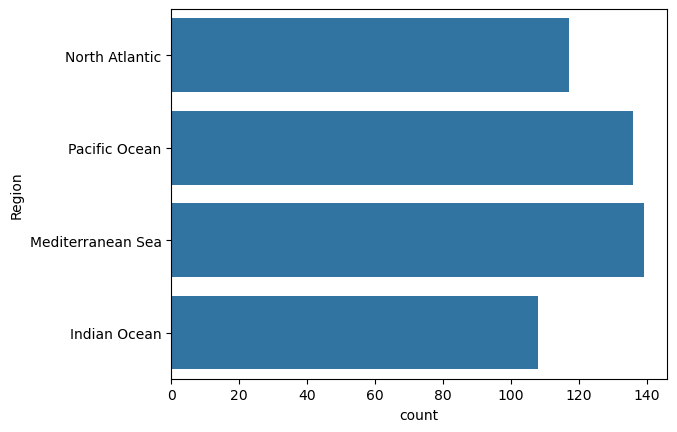

In [13]:
sns.countplot(marine_data['Region'])
plt.show()

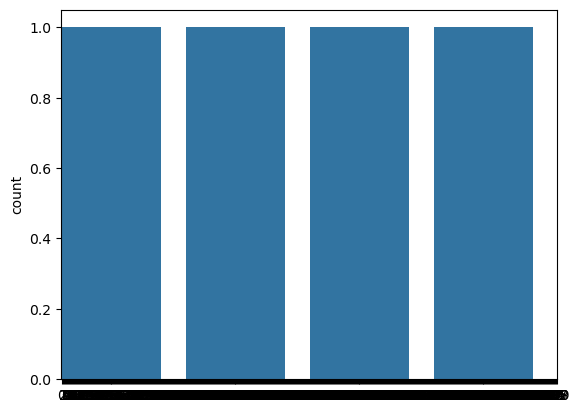

In [14]:
sns.countplot(marine_data['Fish_Population'])
plt.show()

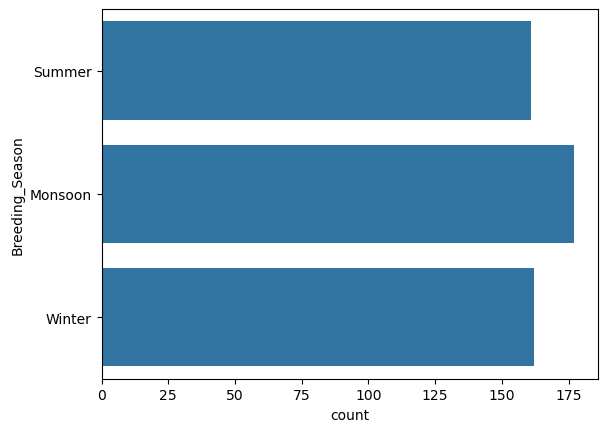

In [15]:
sns.countplot(marine_data['Breeding_Season'])
plt.show()

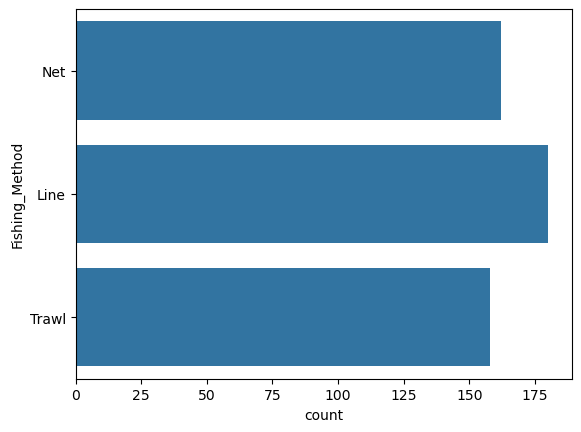

In [16]:
sns.countplot(marine_data['Fishing_Method'])
plt.show()

### Bar plots

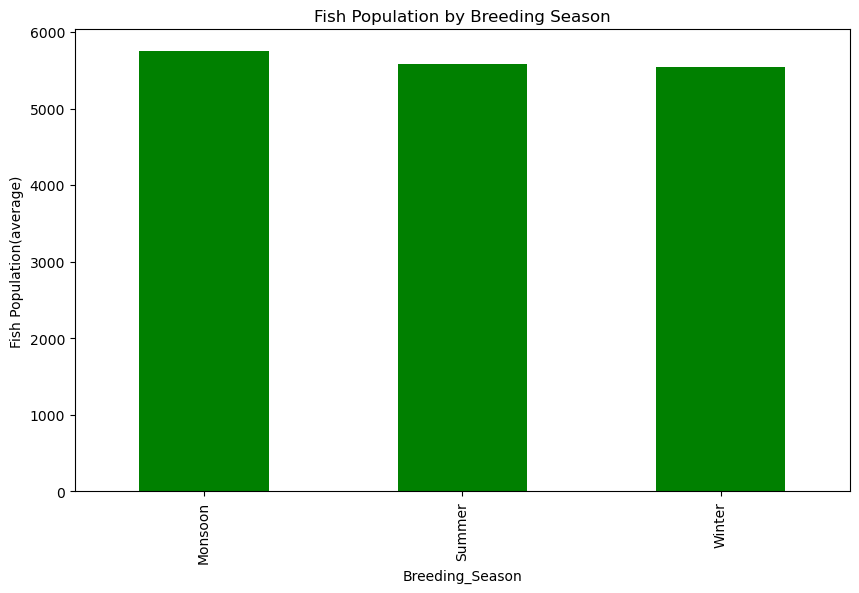

In [17]:
marine_data_fishing_pop = marine_data.groupby('Breeding_Season')['Fish_Population'].mean()
marine_data_fishing_pop.plot(kind = 'bar', color = 'green', figsize = (10,6))
plt.title("Fish Population by Breeding Season")
plt.ylabel('Fish Population(average)')
plt.show()

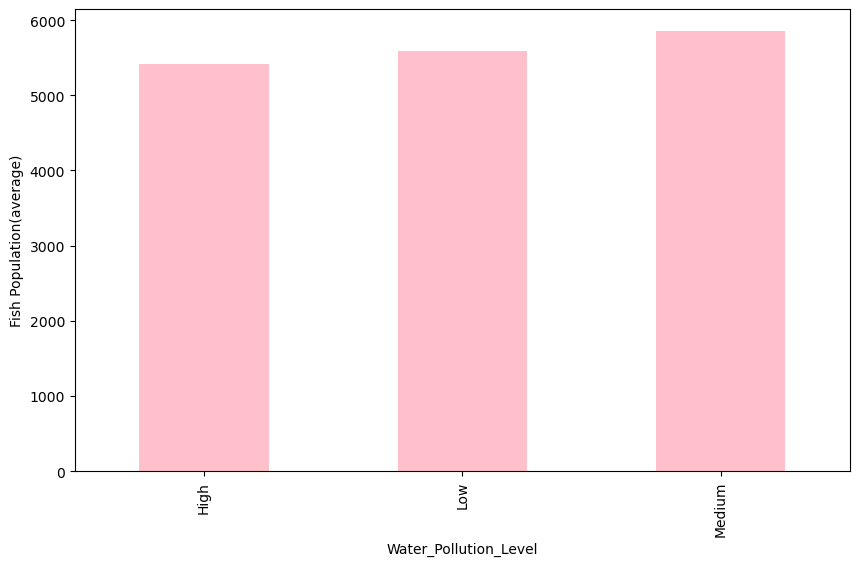

In [18]:
marine_data_fishing_region = marine_data.groupby('Water_Pollution_Level')['Fish_Population'].mean()
marine_data_fishing_region.plot(kind ='bar', color = 'pink', figsize = (10,6))
plt.ylabel('Fish Population(average)')
plt.show()

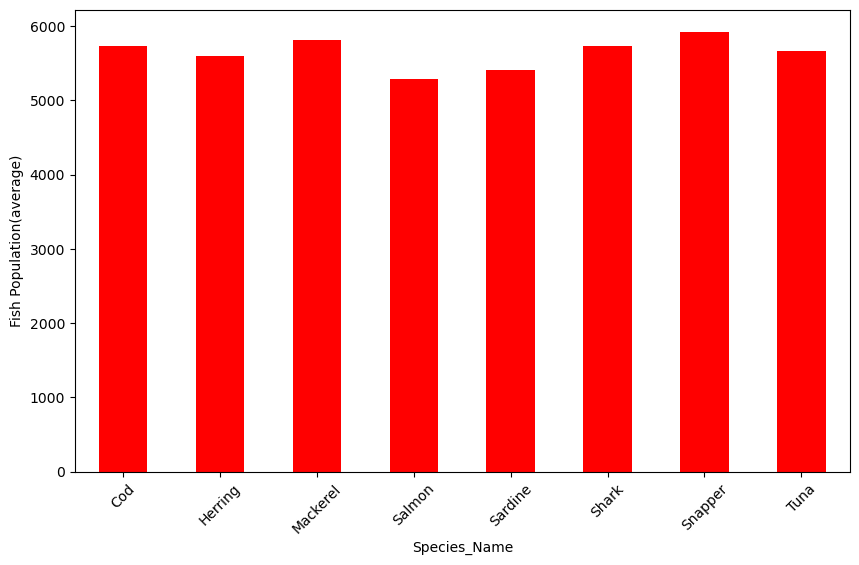

In [19]:
marine_data_fish_species = marine_data.groupby('Species_Name')['Fish_Population'].mean()
marine_data_fish_species.plot(kind = 'bar', color = 'red', figsize = (10,6))
plt.ylabel('Fish Population(average)')
plt.xticks(rotation = 45)
plt.show()

### Pie charts

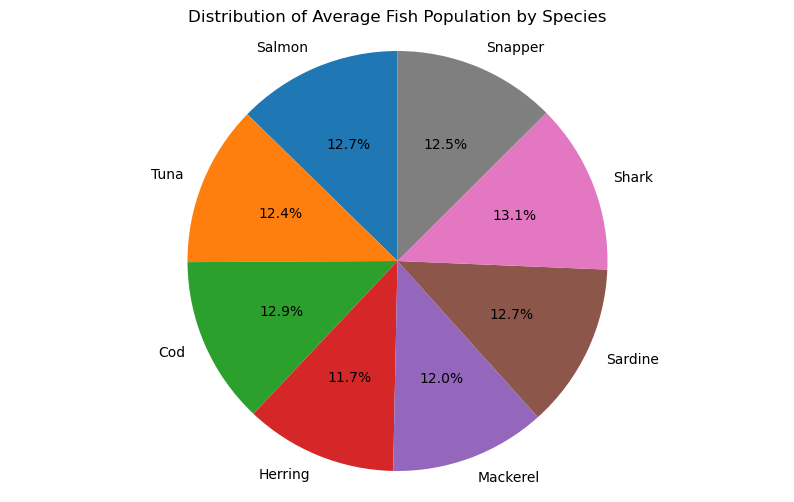

In [20]:
#Pie plot
plt.figure(figsize =(10,6))
plt.pie(marine_data.groupby('Species_Name')['Fish_Population'].mean(), labels = marine_data['Species_Name'].unique(), 
        autopct = '%1.1f%%',
        startangle = 90)
plt.title('Distribution of Average Fish Population by Species')
plt.axis('equal')  
plt.show()

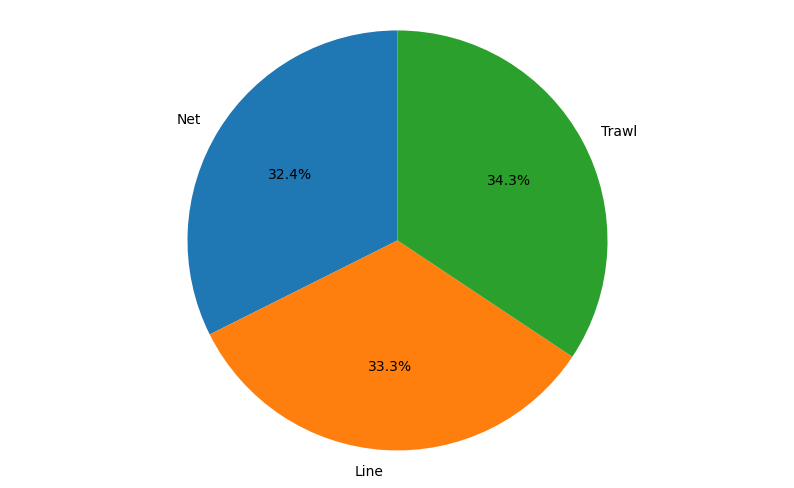

In [21]:
plt.figure( figsize = (10,6))
plt.pie(marine_data.groupby('Fishing_Method')['Fish_Population'].mean(),
        labels = marine_data['Fishing_Method'].unique(),
        autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.show()

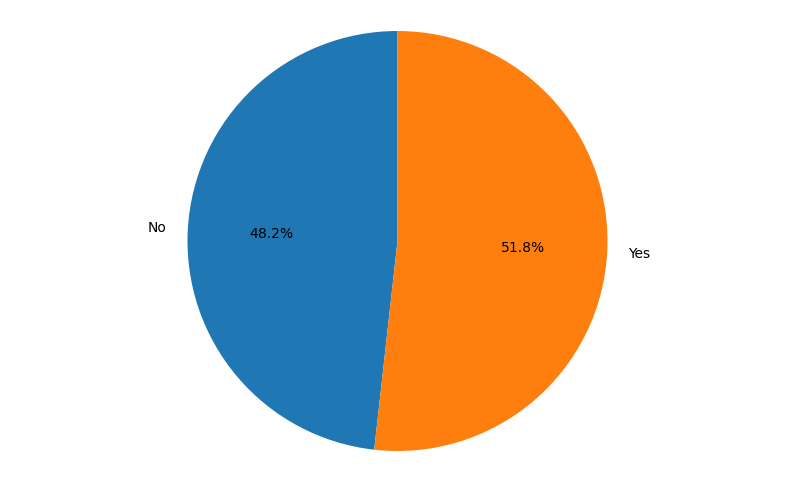

In [22]:
plt.figure( figsize = (10,6))
plt.pie(marine_data.groupby('Overfishing_Risk')['Fish_Population'].mean(),
        labels = marine_data['Overfishing_Risk'].unique(),
        autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.show()

### Numeric values (Histogram)

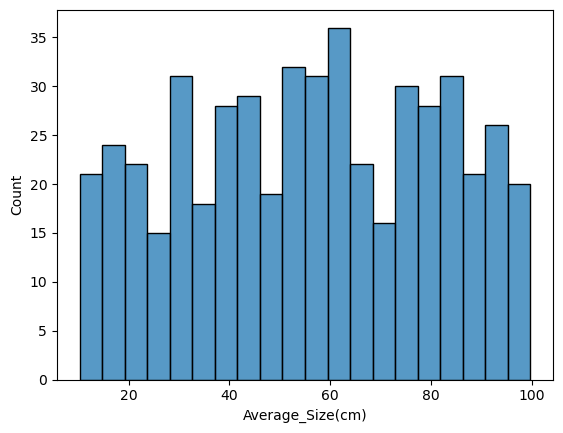

In [23]:
sns.histplot(marine_data['Average_Size(cm)'], bins = 20, kde = False)
plt.show()


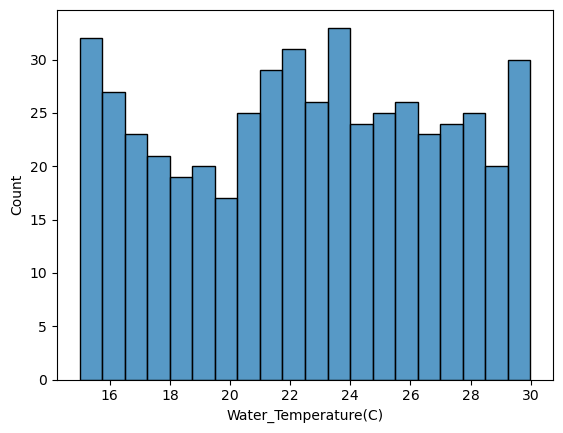

In [24]:
sns.histplot(marine_data['Water_Temperature(C)'], bins = 20, kde = False)
plt.show()

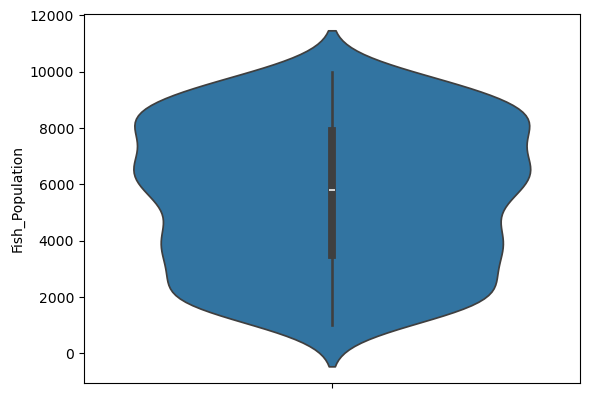

In [25]:
# Violin Plot
sns.violinplot(y=marine_data['Fish_Population'])
plt.show()

### Box Plots

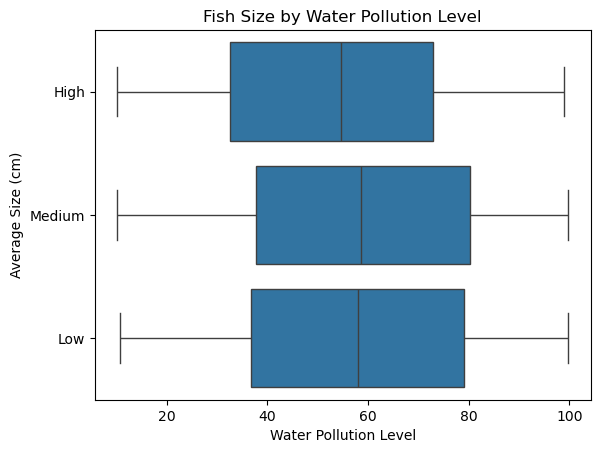

In [26]:
# box plots
sns.boxplot(x = 'Average_Size(cm)', y = 'Water_Pollution_Level', data = marine_data)
plt.title('Fish Size by Water Pollution Level')
plt.xlabel('Water Pollution Level')
plt.ylabel('Average Size (cm)')
plt.show()


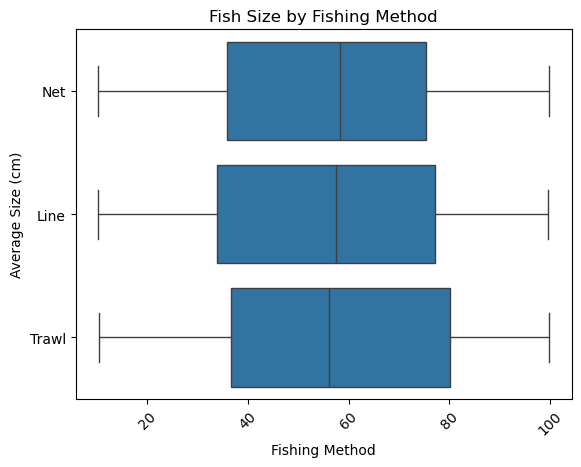

In [27]:
sns.boxplot(x = 'Average_Size(cm)', y = 'Fishing_Method', data = marine_data)
plt.title('Fish Size by Fishing Method')
plt.xlabel('Fishing Method')
plt.ylabel('Average Size (cm)')
plt.xticks(rotation=45)
plt.show()


## CORRLEATION PLOTS

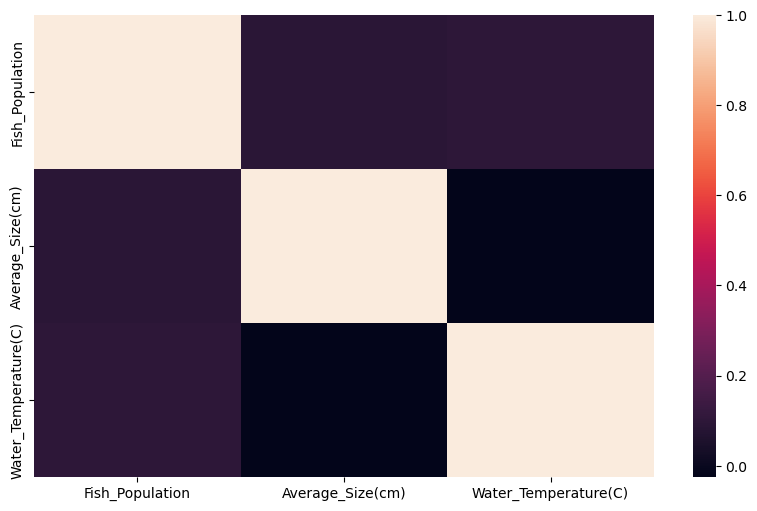

In [28]:
plt.figure(figsize = (10,6))
correlation = marine_data[['Fish_Population', 'Average_Size(cm)', 'Water_Temperature(C)']].corr()
sns.heatmap(correlation, fmt = '.2f')
plt.show()

#### What the correlations show:
#### Fish Population & Average Size: Strong negative correlation (dark color)
#### As fish size increases, population tends to decrease
#### Fish Population & Water Temperature: Strong negative correlation (dark color)
#### As temperature increases, fish population tends to decrease
#### Average Size & Water Temperature: Negative correlation (dark color)
#### As temperature increases, average fish size tends to decrease

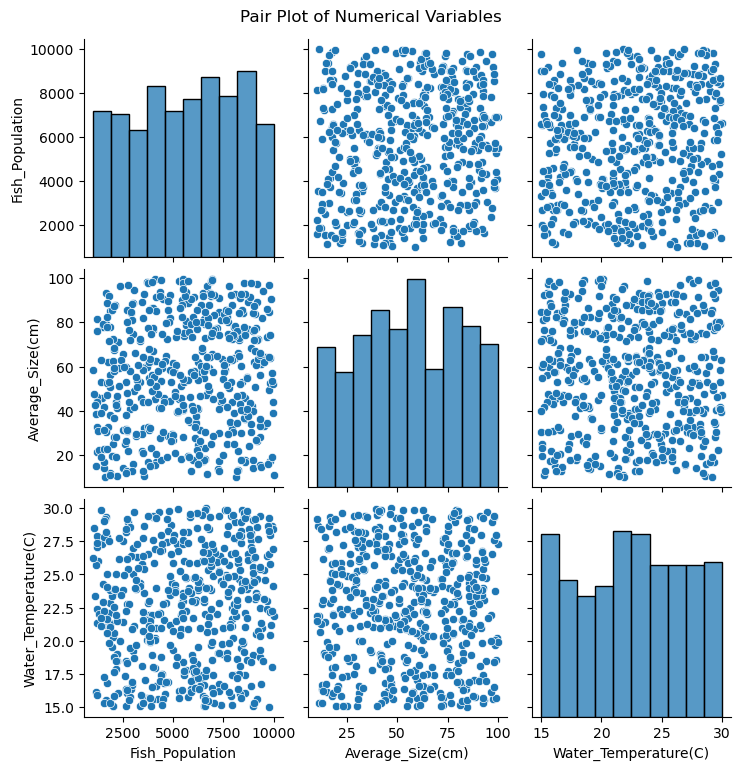

In [29]:
sns.pairplot(marine_data[['Fish_Population', 'Average_Size(cm)', 'Water_Temperature(C)']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


Number of points in each cluster:
Cluster
1    170
2    166
0    164
Name: count, dtype: int64

Cluster centers:
[[8530.26219512   56.6047561    23.31219512]
 [2685.29239766   52.57748538   22.07502924]
 [5795.43636364   59.01545455   22.29163636]]


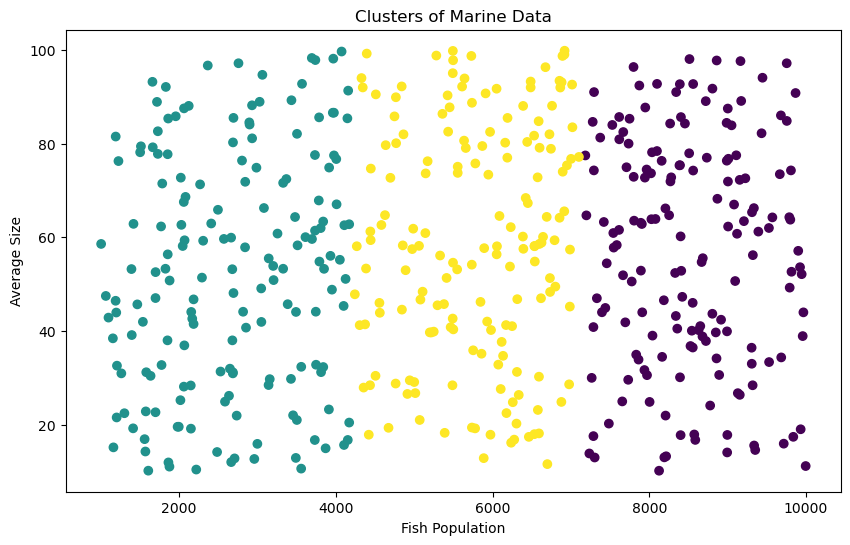

In [7]:
from sklearn.cluster import KMeans

# Step 1: Select numeric features for clustering
numeric_data = marine_data[['Fish_Population', 'Average_Size(cm)', 'Water_Temperature(C)']]

# Step 2: Create and fit the model
kmeans = KMeans(n_clusters=3)
marine_data['Cluster'] = kmeans.fit_predict(numeric_data)

# Step 3: Analyze results
# See cluster distributions
print("\nNumber of points in each cluster:")
print(marine_data['Cluster'].value_counts())

# See cluster characteristics
print("\nCluster centers:")
print(kmeans.cluster_centers_)

# Visualize clusters
plt.figure(figsize=(10,6))
plt.scatter(marine_data['Fish_Population'], marine_data['Average_Size(cm)'], 
           c=marine_data['Cluster'], cmap='viridis')
plt.xlabel('Fish Population')
plt.ylabel('Average Size')
plt.title('Clusters of Marine Data')
plt.show()

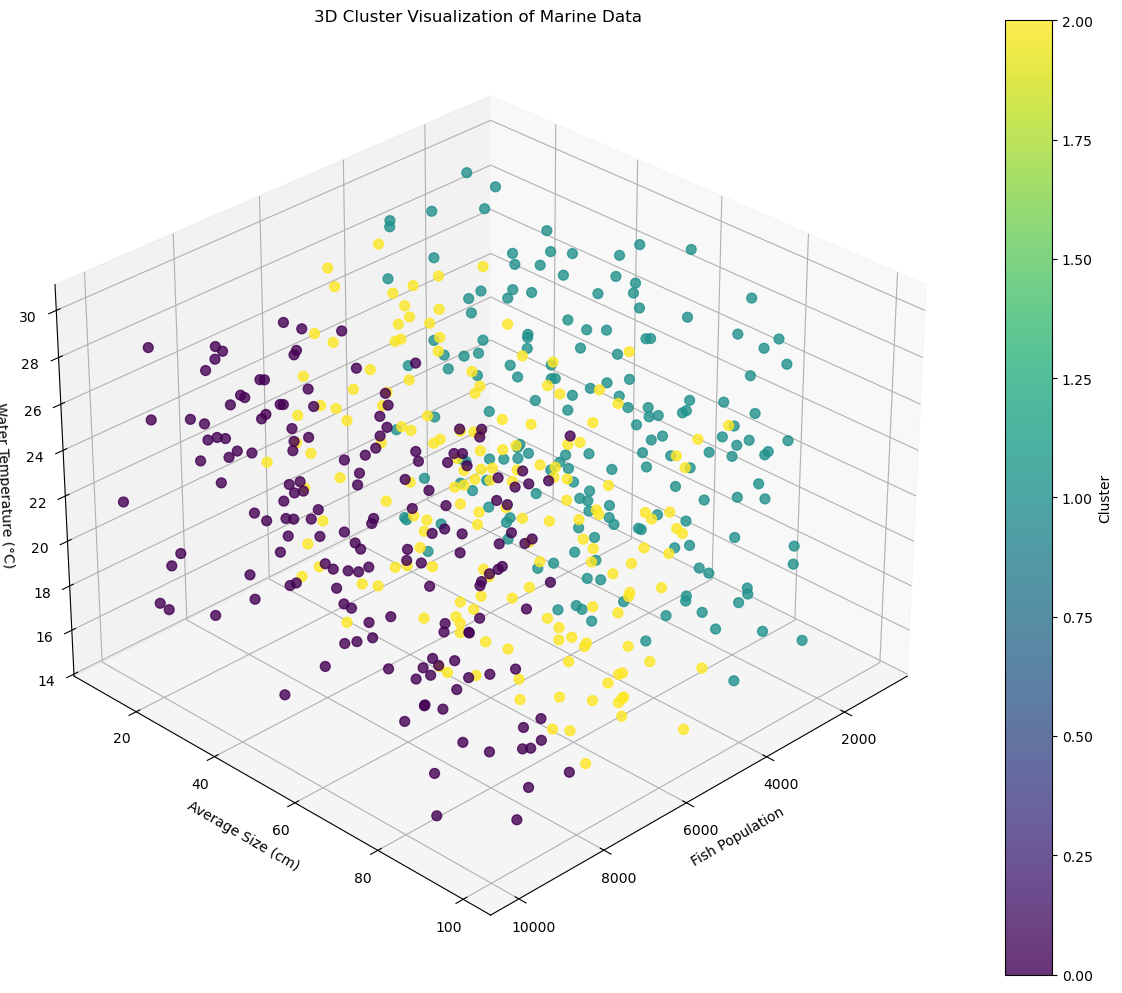

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(
    marine_data['Fish_Population'], 
    marine_data['Average_Size(cm)'],
    marine_data['Water_Temperature(C)'],  # Adding a third variable
    c=marine_data['Cluster'],  # Color by cluster
    cmap='viridis',
    s=50,  # Marker size
    alpha=0.8  # Transparency
)

# Add labels and title
ax.set_xlabel('Fish Population')
ax.set_ylabel('Average Size (cm)')
ax.set_zlabel('Water Temperature (°C)')
ax.set_title('3D Cluster Visualization of Marine Data')

# Add a color bar to show cluster values
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Improve perspective
ax.view_init(elev=30, azim=45)  # Rotation angles

plt.tight_layout()
plt.show()